In [1]:
import numpy as np
import matplotlib.pyplot as plt

def y2row(y,width=8):
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0<=y<=(2**width)-1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    my_list = list(map(int,my_str)) # Python 3
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row=my_array
    return row

def G(row_s, Temp):
    return np.exp(row_s[1:]*row_s[:-1] @ np.ones(len(row_s)-1)/Temp)


def F(row_s, row_t, Temp):
    return np.exp(row_s @ row_t / Temp)

In [2]:
def exercise3(Temps):
    options = np.array([-1, 1])
    result=[]
    for temp in Temps:
        sum=0;
        for x11 in options:
            for x12 in options:
                for x21 in options:
                    for x22 in options:
                       sum+=np.exp((x11*x12+x11*x21+x12*x22+x21*x22)/temp)
        result.append(sum)
    return np.array(result)
print("Exercise3: The results for 2X2 lattice and Temp = 1, 1.5, 2 are: ", exercise3(np.array([1, 1.5, 2])))


Exercise3: The results for 2X2 lattice and Temp = 1, 1.5, 2 are:  [121.23293134  40.92279909  27.04878276]


In [3]:
def exercise4(Temps):
    options = np.array([-1, 1])
    result=[]
    for temp in Temps:
        sum=0;
        for x11 in options:
            for x12 in options:
                for x13 in options:
                    for x21 in options:
                        for x22 in options:
                            for x23 in options:
                                for x31 in options:
                                    for x32 in options:
                                        for x33 in options:
                                            sum+=np.exp((x11*x12 + x11*x21 + x12*x22 + x21*x22 + x22*x23 + x22*x32 + x12*x13 + x21*x31 + x33*x23 + x13*x23 + x31*x32 + x33*x32)/temp)
        result.append(sum)
    return np.array(result)
print("Exercise4: The results for 3X3 lattice and Temp = 1, 1.5, 2 are: ", exercise4(np.array([1, 1.5, 2])))



Exercise4: The results for 3X3 lattice and Temp = 1, 1.5, 2 are:  [365645.74913577  10565.42198351   2674.51812306]


In [4]:
def exercise5(Temps):
    options = np.array([0, 1, 2, 3])
    result=[]
    for temp in Temps:
        sum=0;
        for y1 in options:
            for y2 in options:
                sum+=G(y2row(y1,2),temp) * G(y2row(y2,2),temp) * F(y2row(y1,2),y2row(y2,2),temp)
        result.append(sum)
    return np.array(result)
print("Exercise5: The results for 2X2 lattice and Temp = 1, 1.5, 2 are: ", exercise5(np.array([1, 1.5, 2])))


Exercise5: The results for 2X2 lattice and Temp = 1, 1.5, 2 are:  [121.23293134  40.92279909  27.04878276]


In [5]:
def exercise6(Temps):
    options = np.array([0, 1, 2, 3,4,5,6,7])
    result=[]
    for temp in Temps:
        sum=0;
        for y1 in options:
            for y2 in options:
                for y3 in options:
                    sum+=G(y2row(y1,3),temp) * G(y2row(y2,3),temp) * G(y2row(y3,3),temp) * F(y2row(y1,3),y2row(y2,3),temp) * F(y2row(y2,3),y2row(y3,3),temp)
        result.append(sum)
    return np.array(result)
print("Exercise6: The results for 3X3 lattice and Temp = 1, 1.5, 2 are: ", exercise6(np.array([1, 1.5, 2])))


def debugging_2x2_lattice():
    temp=1
    options = np.array([0, 1, 2, 3])
    def T1(y2):
        sum=0
        for y1 in options:
            sum+=G(y2row(y1,2),temp)*F(y2row(y1,2),y2row(y2,2),temp)
        return sum

    def T2():
        sum=0
        for y2 in options:
            sum+=T1(y2) * G(y2row(y2,2),temp)
        return sum
    print("Debugging 2x2 lattice: ", T2())

def debugging_3x3_lattice():
    temp = 1
    options = np.array([0, 1, 2, 3,4,5,6,7])

    T1Arr = np.zeros(8)
    for i in options:
        sum = 0
        for y1 in options:
            sum += G(y2row(y1, 3), temp) * F(y2row(y1, 3), y2row(i, 3), temp)
        T1Arr[i]=sum

#Second function
    T2Arr = np.zeros(8)
    for i in options:
        sum = 0
        for y2 in options:
            sum += T1Arr[y2] * G(y2row(y2, 3), temp) * F(y2row(y2, 3), y2row(i, 3), temp)
        T2Arr[i]=sum

#Third function
    sum = 0
    for y3 in options:
        sum += T2Arr[y3] * G(y2row(y3, 3), temp)
    print()
    print("Debugging 3x3 lattice: ")
    print("T1: ", T1Arr)
    print("T2: ", T2Arr)
    print("T3: ", sum)

    return sum
debugging_3x3_lattice()


def compute_10_8x8_lattice(count,temp):
    options = np.arange(0,256,1)
    TArr=np.zeros((8,256))
    for i in options:
        sum = 0
        for y1 in options:
            sum += G(y2row(y1), temp) * F(y2row(y1), y2row(i), temp)
        TArr[0][i]=sum # we had a problem right here

    def generic_middle_T(TprevArr):
        TnewArr = np.zeros(256)
        for i in options:
            sum = 0
            for y2 in options:
                sum += TprevArr[y2] * G(y2row(y2), temp) * F(y2row(y2), y2row(i), temp)
            TnewArr[i]=sum
        return TnewArr
    for i in range(1,7):
        TArr[i] = generic_middle_T(TArr[i-1])

    sum = 0
    for y8 in options:
        sum += TArr[6][y8] * G(y2row(y8), temp)
    Z_temp =  sum
    def P8():
        ans = np.zeros(256)
        for i in range (256):
            p8Vec = TArr[6][i] * G(y2row(i), temp)
            ans[i] = p8Vec/Z_temp
        return ans

    def GenPk(k):
        # K is number between 2 - 7!!!!!!!!!!!!!
        # Yk is number 0-255
        ans = np.zeros((256, 256))
        for i in options:
            for j in options:
                ans[i][j] = (TArr[k - 2][i] * G(y2row(i),temp) * F(y2row(i), y2row(j), temp)) / TArr[k-1][j] #TODO MAKE SURE THAT K INDEXES ARE CORRECT
        return ans

#     def GenP1():
# # K is number between 2 - 7
# # Yk is number 0-255
#         ans = np.zeros((256,256))
#         for i in options:
#             for j in options:
#                 ans[i][j] = (G(y2row(i),temp) *  (F(y2row(i), y2row(j), temp) / TArr[0][j]))
#         return ans




    def GenP1():
        ans = np.zeros((256,256))
        for i in range(256):
            for j in range(256):
                ans[i][j] = (G(y2row(i),temp) * F(y2row(i),y2row(j),temp)) /TArr[0][j]
        return ans


    Ps = []
    Ps.append(P8())
    Ps.append(GenPk(7))
    Ps.append(GenPk(6))
    Ps.append(GenPk(5))
    Ps.append(GenPk(4))
    Ps.append(GenPk(3))
    Ps.append(GenPk(2))
    Ps.append(GenP1())

    toReturn = []
    for i in range(count):
        Ys = []
        Ys.append(np.random.choice(256,1,p=Ps[0]))
        for i in range(1,8):
            Ys.append(np.random.choice(256,1,p=Ps[i].T[int(Ys[0])]))

        ans = y2row(int(Ys[0]))
        for i in range (1,8):
            ans= np.block([[ans],
                          [y2row(int(Ys[i]))]])

        toReturn.append(ans.reshape(8,8))

    return toReturn

Exercise6: The results for 3X3 lattice and Temp = 1, 1.5, 2 are:  [365645.74913577  10565.42198351   2674.51812306]

Debugging 3x3 lattice: 
T1:  [155.37102759  46.44297052  31.70116107  46.44297052  46.44297052
  31.70116107  46.44297052 155.37102759]
T2:  [23416.16435187  4634.76802124  3916.10003703  4634.76802124
  4634.76802124  3916.10003703  4634.76802124 23416.16435187]
T3:  365645.7491357699


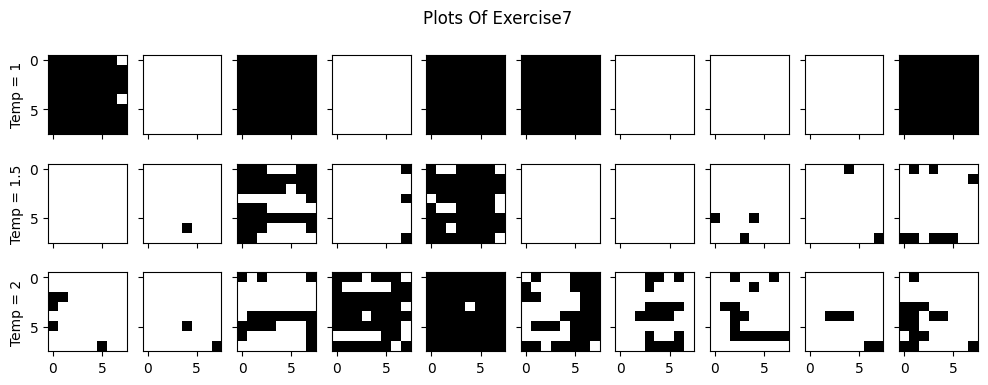

In [6]:
def exercise7():
    ans1 = compute_10_8x8_lattice(10,1)
    ans2 = compute_10_8x8_lattice(10,1.5)
    ans3 = compute_10_8x8_lattice(10,2)


    answers = [ans1,ans2,ans3]
    fig, axs = plt.subplots(3, 10)
    fig.suptitle('Plots Of Exercise7')

    index = ["1","1.5","2"]
    for i in range(3):
        for j in range(10):
            axs[i,j].imshow(answers[i][j],cmap='Greys' ,vmin=-1, vmax=+1 , interpolation="None")
    for ax in axs.flat[:10]:
        ax.set(ylabel='Temp = 1')
    for ax in axs.flat[10:20]:
        ax.set(ylabel='Temp = 1.5')
    for ax in axs.flat[20:]:
        ax.set(ylabel='Temp = 2')

    for ax in axs.flat:
        ax.label_outer()

    fig.set_size_inches(12, 4)
    plt.show()
exercise7()

In [7]:
def exercise8():
    temps = [1,1.5,2,10,100]

    for temp in temps:
        sum1122=0
        sum1188=0
        samples = compute_10_8x8_lattice(10000,temp)
        for sample in samples:
            sum1122+=sample[0][0]*sample[1][1]
            sum1188+=sample[0][0]*sample[7][7]
        sum1122 = sum1122/len(samples)
        sum1188 = sum1188/len(samples)
        print("For temp = ",temp,": Etemp(x11x22)= ",sum1122," Etemp(x11x88)= ",sum1188)
    print(
        "The results we obtained are reasonable: there was a strong correlation between the nearby vertices when the temperature was low, with a match rate of 95%. As we examined vertices that were further apart, the match rate remained high but slightly lower than for the closer vertices, which is in accordance with the Ising Model.")
    print(
        "When the temperature increased, we observed a decrease in the match rate. Specifically, at a temperature of 2, we found that the match rate for nearby vertices was 50%. This suggests that 75% of the samples were either (1,1) or (-1,-1), while 25% were (1,-1) or (-1,1).")
    print(
        "As we examined vertices that were further apart, the match rate decreased, reaching a value of 12%. This suggests that as the distance between the vertices increased, there was less correlation or connection between them, as expected according to the Ising Model.")
    print(
        "As an experiment, we tried setting the temperature to 100 and found that the results were close to 0 in both cases. This occurred because at high temperatures, there is typically no correlation or relationship between the variables.")

exercise8()

For temp =  1 : Etemp(x11x22)=  0.9522  Etemp(x11x88)=  0.8796
For temp =  1.5 : Etemp(x11x22)=  0.776  Etemp(x11x88)=  0.4914
For temp =  2 : Etemp(x11x22)=  0.5066  Etemp(x11x88)=  0.1064
For temp =  10 : Etemp(x11x22)=  0.022  Etemp(x11x88)=  0.016
For temp =  100 : Etemp(x11x22)=  0.0196  Etemp(x11x88)=  0.0
The results we obtained are reasonable: there was a strong correlation between the nearby vertices when the temperature was low, with a match rate of 95%. As we examined vertices that were further apart, the match rate remained high but slightly lower than for the closer vertices, which is in accordance with the Ising Model.
When the temperature increased, we observed a decrease in the match rate. Specifically, at a temperature of 2, we found that the match rate for nearby vertices was 50%. This suggests that 75% of the samples were either (1,1) or (-1,-1), while 25% were (1,-1) or (-1,1).
As we examined vertices that were further apart, the match rate decreased, reaching a val

In [8]:
def exercise9():
    print("Exercise 9:")
    temps = np.array([1,1.5,2])
    for temp in temps:
        sum1122=0
        sum1188=0
        for times in range(10000):
            x=np.random.randint(low=0, high=2,size=(10,10))*2-1
            x[0] = x[0]*0
            x.T[0] = x.T[0]*0
            x.T[9] = x.T[9]*0
            x[9] = x[9]*0
            for k in range(25):
                for i in range(1,9):
                    for j in range(1,9):
                        sum=(x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1])/temp
                        normalizer = np.exp(sum)+np.exp(-sum)
                        theta = np.exp(sum)/normalizer
                        x[i][j] = int(np.random.rand()<theta)*2-1
            x=x[1:9,1:9]
            sum1122+=x[0,0]*x[1,1]
            sum1188+=x[0,0]*x[7,7]
        sum1122 = sum1122/10000
        sum1188 = sum1188/10000
        print("With Method 1 and temp = ",temp,": Etemp(x11x22)= ",sum1122," Etemp(x11x88)= ",sum1188)
    print()
    for temp in temps:
        sum1122=0
        sum1188=0
        x=np.random.randint(low=0, high=2,size=(10,10))*2-1
        x[0] = x[0]*0
        x.T[0] = x.T[0]*0
        x.T[9] = x.T[9]*0
        x[9] = x[9]*0
        for k in range(100):
            for i in range(1,9):
                for j in range(1,9):
                    sum=(x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1])/temp
                    normalizer = np.exp(sum)+np.exp(-sum)
                    theta = np.exp(sum)/normalizer
                    x[i][j] = int(np.random.rand()<theta)*2-1
        for k in range(24900):
            for i in range(1,9):
                for j in range(1,9):
                    sum=(x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1])/temp
                    normalizer = np.exp(sum)+np.exp(-sum)
                    theta = np.exp(sum)/normalizer
                    x[i][j] = int(np.random.rand()<theta)*2-1
            sum1122+=x[1,1]*x[2,2]
            sum1188+=x[1,1]*x[8,8]

        sum1122 = sum1122/24900
        sum1188 = sum1188/24900
        print("With Method 2 and temp = ",temp,": Etemp(x11x22)= ",sum1122," Etemp(x11x88)= ",sum1188)
    print("Despite the similarity in the outcomes of the two compared methods, one of them was found to be superior. Specifically, method 1 generated 10,000 images from 25 sweeps that were somewhat close to the distribution, but not as accurate as they could have been.")
    print("On the other hand, method 2 proved to be more successful as since the 100th sweep, every sweep produced nearly exact sample from the distribution.")



exercise9()


Exercise 9:
With Method 1 and temp =  1.0 : Etemp(x11x22)=  0.9348  Etemp(x11x88)=  0.5476
With Method 1 and temp =  1.5 : Etemp(x11x22)=  0.7432  Etemp(x11x88)=  0.3556
With Method 1 and temp =  2.0 : Etemp(x11x22)=  0.5138  Etemp(x11x88)=  0.1192

With Method 2 and temp =  1.0 : Etemp(x11x22)=  0.9526907630522088  Etemp(x11x88)=  0.909718875502008
With Method 2 and temp =  1.5 : Etemp(x11x22)=  0.7663453815261044  Etemp(x11x88)=  0.5355823293172691
With Method 2 and temp =  2.0 : Etemp(x11x22)=  0.5024096385542168  Etemp(x11x88)=  0.12530120481927712
Despite the similarity in the outcomes of the two compared methods, one of them was found to be superior. Specifically, method 1 generated 10,000 images from 25 sweeps that were somewhat close to the distribution, but not as accurate as they could have been.
On the other hand, method 2 proved to be more successful as since the 100th sweep, every sweep produced nearly exact sample from the distribution.


Exercise 10:


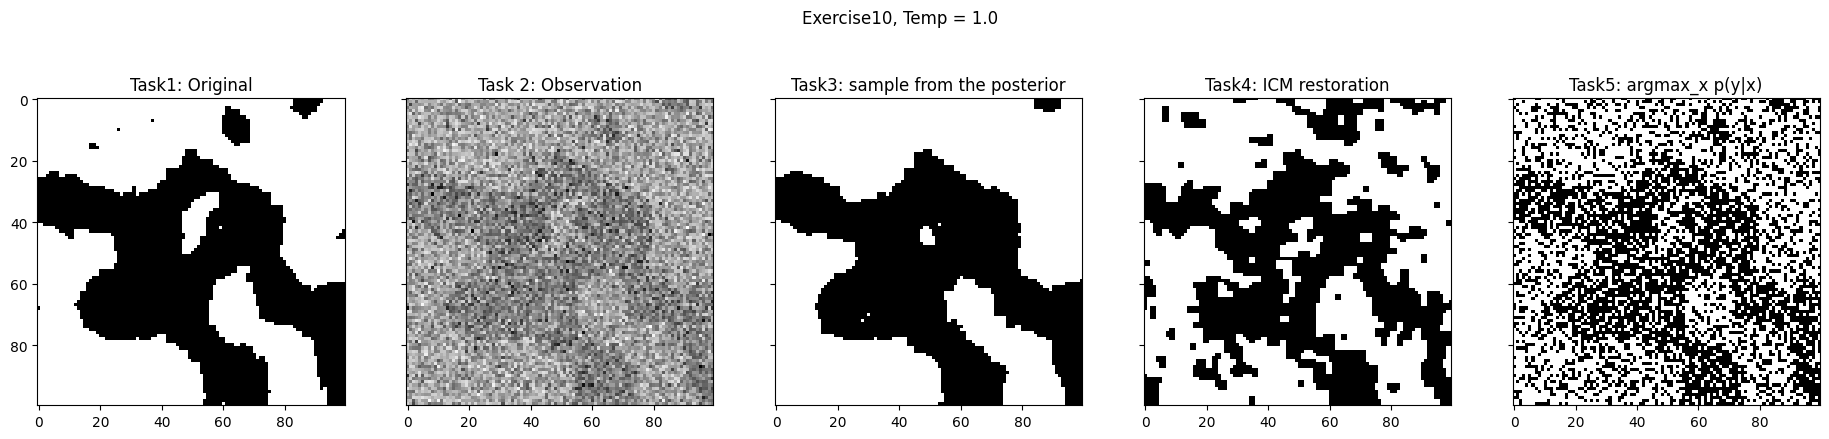

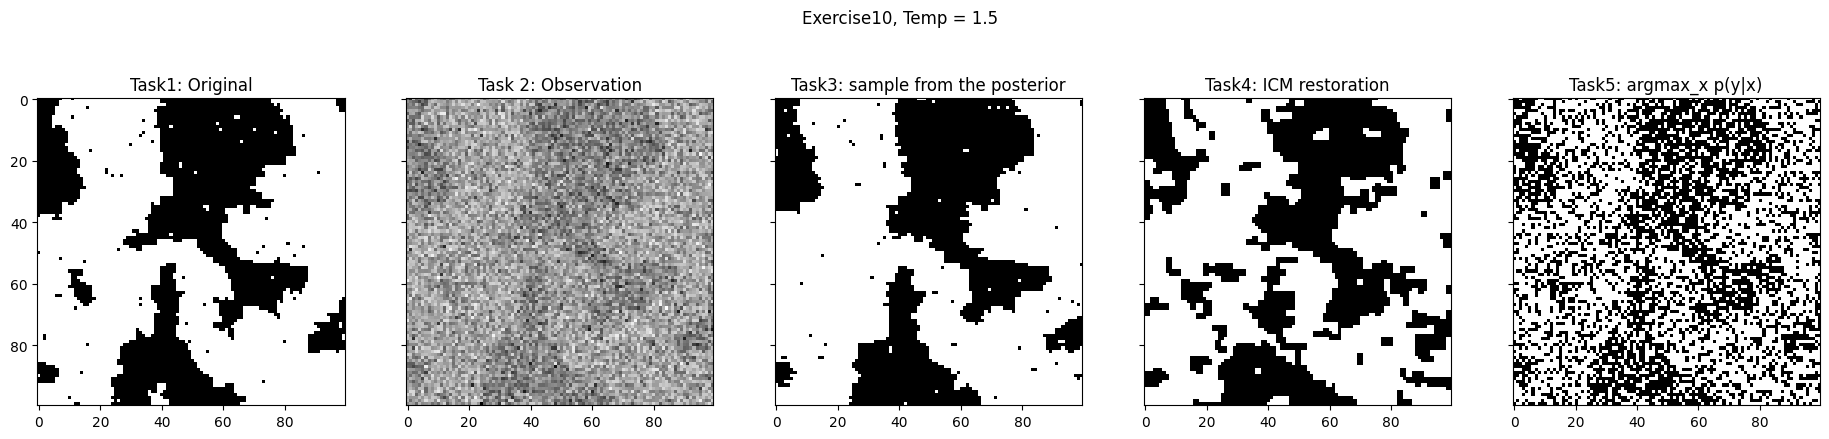

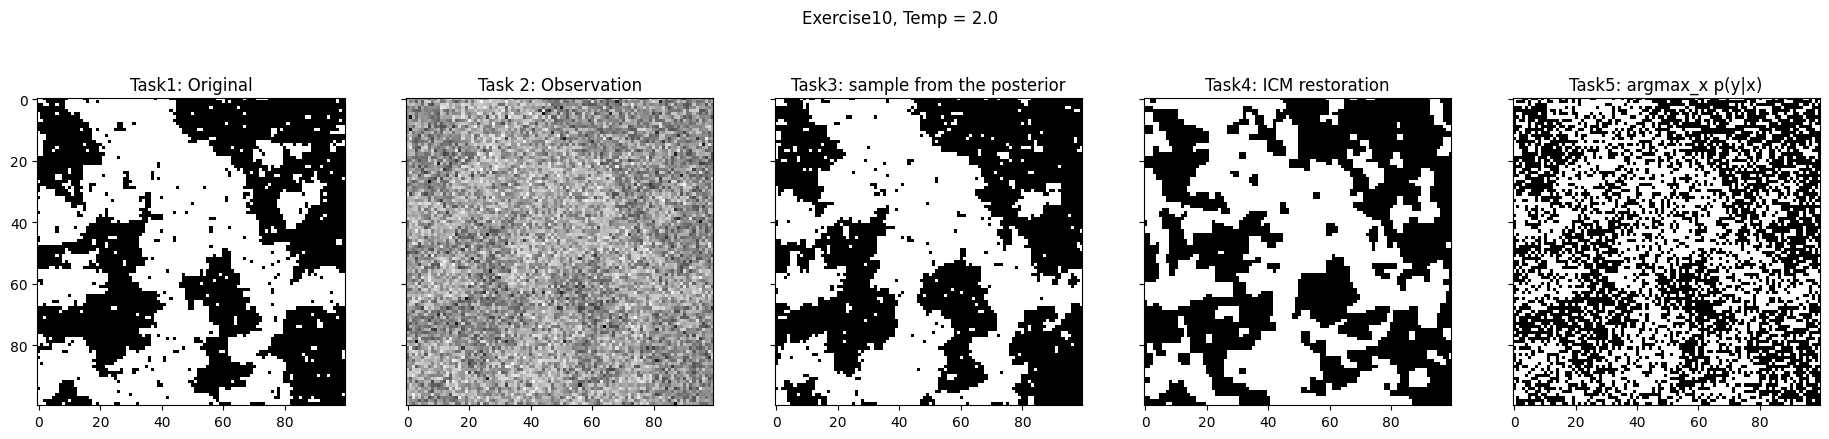

In [9]:
def exercise10():

    print("Exercise 10:")
    temps = np.array([1,1.5,2])
    for temp in temps:


        #Task1
        x=np.random.randint(low=0, high=2,size=(102,102))*2-1
        x[0] = x[0]*0
        x.T[0] = x.T[0]*0
        x.T[101] = x.T[101]*0
        x[101] = x[101]*0
        for k in range(50):
            for i in range(1,101):
                for j in range(1,101):
                    sum=(x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1])/temp
                    normalizer = np.exp(sum)+np.exp(-sum)
                    theta = np.exp(sum)/normalizer
                    x[i][j] = int(np.random.rand()<theta)*2-1
        fig, axs = plt.subplots(1,5)
        fig.suptitle('Exercise10, Temp = '+ str(temp))
        axs[0].imshow(x[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
        axs[0].set_title('Task1: Original')



        #Task 2
        eta = 2*np.random.standard_normal((102,102))
        y=x+eta
        axs[1].imshow(y[1:101,1:101], cmap="Greys" , interpolation="None")
        axs[1].set_title('Task 2: Observation')



        #Task3:
        x=np.random.randint(low=0, high=2,size=(102,102))*2-1
        x[0] = x[0]*0
        x.T[0] = x.T[0]*0
        x.T[101] = x.T[101]*0
        x[101] = x[101]*0
        for k in range(50):
            for i in range(1,101):
                for j in range(1,101):
                    sum=(x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1])/temp
                    frac1=np.exp( sum - (1/8)*(y[i,j]-1)**2)
                    frac2=np.exp(-sum - (1/8)*(y[i,j]+1)**2)
                    normalizer = frac1+frac2
                    theta = frac1/normalizer
                    x[i][j] = int(np.random.rand()<theta)*2-1
        axs[2].imshow(x[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
        axs[2].set_title('Task3: sample from the posterior')



        #Task4
        x=np.random.randint(low=0, high=2,size=(102,102))*2-1
        x[0] = x[0]*0
        x.T[0] = x.T[0]*0
        x.T[101] = x.T[101]*0
        x[101] = x[101]*0
        for k in range(30):
            for i in range(1,101):
                for j in range(1,101):
                    sum=(x[i-1][j] + x[i+1][j] + x[i][j-1] + x[i][j+1])/temp
                    frac1=np.exp( sum - (1/8)*(y[i,j]-1)**2)
                    frac2=np.exp(-sum - (1/8)*(y[i,j]+1)**2)
                    x[i][j] = int(frac1>frac2)*2-1
        axs[3].imshow(x[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
        axs[3].set_title('Task4: ICM restoration')


        #task5
        sign=np.zeros((102,102))
        sign[y>0]=1
        sign[sign!=1]=-1

        axs[4].imshow(sign[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
        axs[4].set_title('Task5: argmax_x p(y|x)')

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for ax in axs.flat:
            ax.label_outer()

        fig.set_size_inches(23, 5)
        plt.show()




exercise10()

